day_of_week       Friday       Monday     Saturday       Sunday     Thursday  \
decade                                                                         
1960         5107.884615  5063.826923  4651.057692  4342.346154  4978.288462   
1970         4782.095785  4689.097701  4207.784483  3979.278736  4696.923372   
1980         5393.087234  5276.907249  4483.901064  4308.120469  5333.485106   

day_of_week      Tuesday    Wednesday  
decade                                 
1960         5286.096154  5074.622642  
1970         4885.252399  4750.376200  
1980         5503.842553  5367.642553  


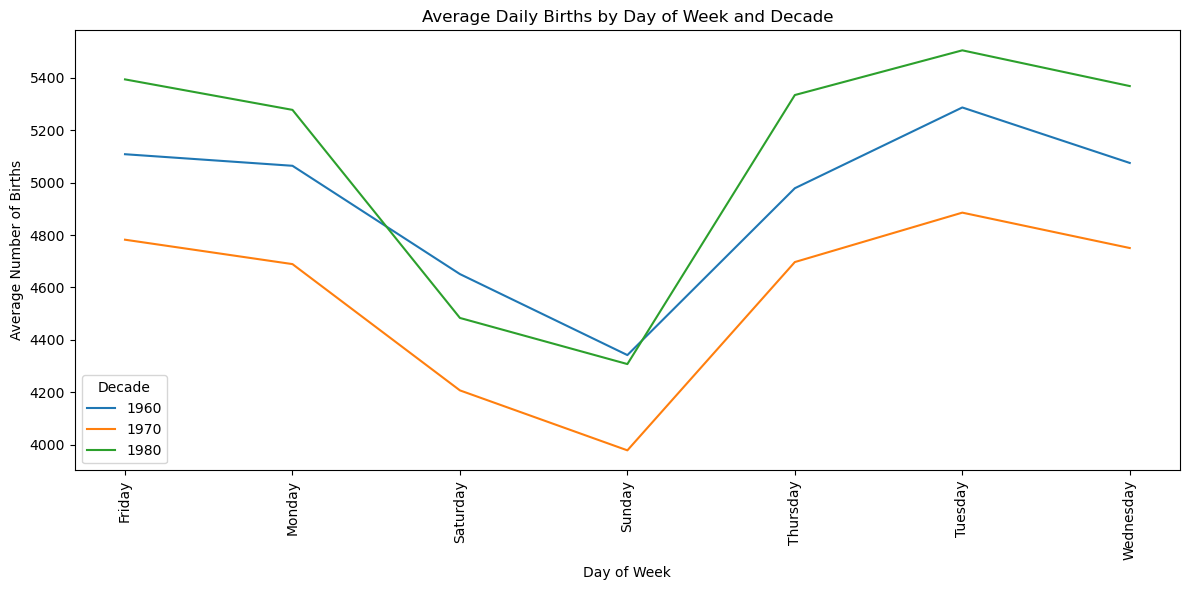

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('birth.txt')

# Clean the data
data = data[(data['month'] >= 1) & (data['month'] <= 12) &
            (data['day'] >= 1) & (data['day'] <= 31)]

# Create datetime and extract day of week
data['date'] = pd.to_datetime(data[['year', 'month', 'day']], errors='coerce')
# data = data.dropna(subset=['date'])  # drop rows where date conversion failed
data['day_of_week'] = data['date'].dt.day_name()

# Create a decade column
data['decade'] = (data['year'] // 10) * 10

# Group and calculate average daily births
avg_daily = data.groupby(['decade', 'day_of_week'])['births'].mean().unstack()

# Reorder columns to match weekday order
# ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# avg_daily = avg_daily[ordered_days]

# Display result
print(avg_daily)

# example: 5 decades
avg_daily.T.plot(figsize=(12, 6))

plt.title('Average Daily Births by Day of Week and Decade')
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Births')
plt.xticks(rotation=90)
plt.legend(title='Decade')
plt.tight_layout()
plt.show()


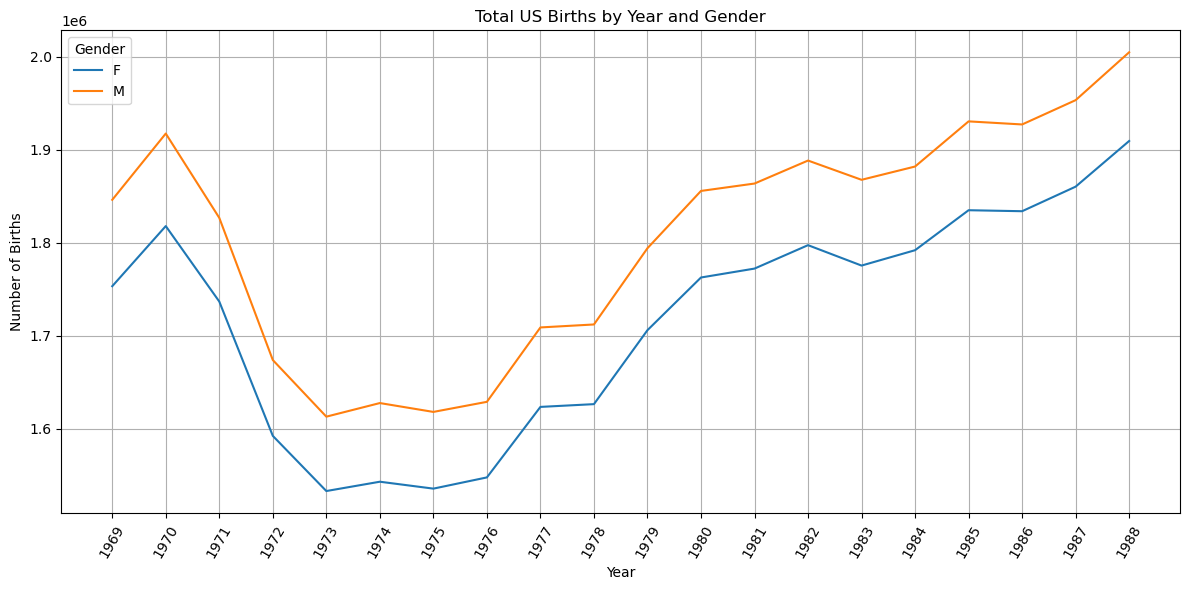

In [23]:
# Group by year and gender, sum births
total = data.groupby(['year', 'gender'])['births'].sum().unstack()

# Plot
plt.figure(figsize=(12, 6))
for gender in total.columns:
    plt.plot(total.index, total[gender], label=gender)

# X-axis setup
plt.xticks(ticks=total.index, rotation=60)
plt.title('Total US Births by Year and Gender')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend(title='Gender')
plt.grid(True)
plt.tight_layout()
plt.show()